<h1>Coffee Lovers in Toronto</h1>

<p>Import the required libraries.</p>

In [15]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline

<p>Import the neighborhood data.</p>

In [16]:
neighborhood_data = pd.read_excel('neighborhood_data.xlsx')
neighborhood_data.head()

,Name,Number,Long,Lat,Land_area,Radius,Pop_2016,Population_density
0,Agincourt North,129,-79.266698,43.804038,7.41,1536,29113,3929
1,Agincourt South-Malvern West,128,-79.263500,43.789380,7.83,1579,23757,3034
2,Alderwood,20,-79.542386,43.603685,4.95,1255,12054,2435
3,Annex,95,-79.404321,43.672333,2.81,946,30526,10863
4,Banbury-Don Mills,42,-79.350670,43.736365,9.98,1782,27695,2775


<p>Initialize variables with Foursquare credentials.</p>

In [17]:
CLIENT_ID = 'DH3HDLNOUPDVPEWYQ4FXRLQBL5KN322XJDFGSVO5ABK33E4K' 
CLIENT_SECRET = 'Y4BYFIZYJ0Z0ZBTGS5PMS4BOLTLIW1V0WC52L2FT2DF3RNHF' 
VERSION = '20181101'

<p>Define a method to get the category for a location.</p>

In [18]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

<p>Define a method to get the coffee house locations for each neighborhood.</p>

In [19]:
def get_venues_by_nbh(lat, lng, radius, nbh):
    LIMIT = 1000
    QUERY = 'coffee'

    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&section={}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lng, 
        QUERY,
        radius,
        LIMIT)

    results = requests.get(url).json()
    print(results)
    venues = results['response']['groups'][0]['items']
    
    nearby_venues = json_normalize(venues) 
    
    if not nearby_venues.empty:
        
        # filter columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        nearby_venues =nearby_venues.loc[:, filtered_columns]

        # filter the category for each row
        nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

        # clean columns
        nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

        nearby_venues['categories'] = np.where(nearby_venues['categories'] == "Café", "Coffee Shop", nearby_venues['categories'])

        nearby_venues = nearby_venues[nearby_venues.categories == "Coffee Shop"]

        nearby_venues['Number'] = nbh
        return nearby_venues

<p>Create the dataframe that will hold the coffee locations.</p>

In [20]:
venues_columns = ['name', 'categories', 'lat', 'lng', 'Number']
to_coffee = pd.DataFrame(columns=venues_columns)

<p>Loop through the neighbours and query Foursquare for each.</p>

In [21]:
for lat, lng, radius, nbh in zip(neighborhood_data['Lat'], neighborhood_data['Long'], neighborhood_data['Radius'], neighborhood_data['Number']): 
    all_venues = get_venues_by_nbh(lat, lng, radius, nbh)
    frames = [to_coffee, all_venues]
    to_coffee = pd.concat(frames)

{'meta': {'code': 200, 'requestId': '5c33d341351e3d2623c021f9'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Agincourt', 'headerFullLocation': 'Agincourt, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 4, 'suggestedBounds': {'ne': {'lat': 43.81786188282401, 'lng': -79.24757962235843}, 'sw': {'lat': 43.790213855175985, 'lng': -79.28581707264156}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b78182cf964a52085b52ee3', 'name': 'Tim Hortons', 'location': {'address': '1571 Sandhurst Circle, Unit 420', 'crossStreet': 'at Woodside Square', 'lat': 43.8097214559678, 'lng': -79.2695653438568, 'labeledLatLngs': [{'label': 'display', 'lat': 43.8097214559678, 'lng': -79.2695653438568}], 'di

{'meta': {'code': 200, 'requestId': '5c33d342db04f5569055ab01'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Alderwood', 'headerFullLocation': 'Alderwood, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 7, 'suggestedBounds': {'ne': {'lat': 43.614980188295014, 'lng': -79.5268170561054}, 'sw': {'lat': 43.59239016570499, 'lng': -79.5579550038946}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b75b053f964a5202a1d2ee3', 'name': 'Fair Grounds Cafe & Roastery', 'location': {'address': '3785 Lake Shore Blvd. W', 'crossStreet': 'Fortieth St', 'lat': 43.5924650760416, 'lng': -79.54157876415731, 'labeledLatLngs': [{'label': 'display', 'lat': 43.5924650760416, 'lng': -79.54157876415731}], '

{'meta': {'code': 200, 'requestId': '5c33d3436a60713c267b53a2'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Sunnybrook - York Mills', 'headerFullLocation': 'Sunnybrook - York Mills, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 9, 'suggestedBounds': {'ne': {'lat': 43.752403144538015, 'lng': -79.32851455009263}, 'sw': {'lat': 43.72032711246198, 'lng': -79.37282580190735}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4e11eea96284edb6badbaa31', 'name': 'Aroma Espresso Bar', 'location': {'address': '1090 Don Mills Rd.', 'crossStreet': 'Shops at Don Mills', 'lat': 43.73439968185306, 'lng': -79.3452038090861, 'labeledLatLngs': [{'label': 'display', 'lat': 43.73439968185306, 'lng': 

{'meta': {'code': 200, 'requestId': '5c33d344351e3d26264537ef'}, 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."}, 'headerLocation': 'Westminster - Branson', 'headerFullLocation': 'Westminster - Branson, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 3, 'suggestedBounds': {'ne': {'lat': 43.78015483600701, 'lng': -79.43489048770813}, 'sw': {'lat': 43.75814081399299, 'lng': -79.46531829629187}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b5fb5f9f964a5206cc929e3', 'name': 'Tim Hortons', 'location': {'address': '309 Finch Ave West, Ste C', 'crossStreet': 'at Bathurst St.', 'lat': 43.7729215, 'lng': -79.4422996, 'labeledLatLngs': [{'label': 'display', 'lat': 43.772921

{'meta': {'code': 200, 'requestId': '5c33d3454434b96e8a531859'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Bayview Village', 'headerFullLocation': 'Bayview Village, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 11, 'suggestedBounds': {'ne': {'lat': 43.788149629966014, 'lng': -79.36005369105919}, 'sw': {'lat': 43.76521760703399, 'lng': -79.3917543559408}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bfc2854e9d8c928cc1eb2c7', 'name': 'Starbucks', 'location': {'address': '1015 Sheppard Ave E', 'crossStreet': 'btwn Blue Ridge Rd & Provost Dr', 'lat': 43.769777521540775, 'lng': -79.37267858071249, 'labeledLatLngs': [{'label': 'display', 'lat': 43.769777521540775, 'lng': -79.3726

{'meta': {'code': 200, 'requestId': '5c33d3454c1f674085771abb'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Bayview Woods - Steeles', 'headerFullLocation': 'Bayview Woods - Steeles, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 4, 'suggestedBounds': {'ne': {'lat': 43.80706161823301, 'lng': -79.36799793201853}, 'sw': {'lat': 43.78659559776699, 'lng': -79.39629919198147}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b1978dff964a520f4dd23e3', 'name': 'Second Cup', 'location': {'address': '1567 Steeles Avenue East', 'lat': 43.80548058577754, 'lng': -79.3845966684881, 'labeledLatLngs': [{'label': 'display', 'lat': 43.80548058577754, 'lng': -79.3845966684881}], 'distance': 983, 'p

{'meta': {'code': 200, 'requestId': '5c33d346351e3d2629bbc145'}, 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."}, 'headerLocation': 'Keelesdale', 'headerFullLocation': 'Keelesdale, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 3, 'suggestedBounds': {'ne': {'lat': 43.70041715684901, 'lng': -79.4718476207461}, 'sw': {'lat': 43.68671914315099, 'lng': -79.49075715425388}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4c6ec8c94d24b60c7cbad9d8', 'name': 'Tim Hortons', 'location': {'address': '500 Trethewey Dr', 'crossStreet': 'Black Creek Drive', 'lat': 43.6957213925918, 'lng': -79.48775097727776, 'labeledLatLngs': [{'label': 'display', 'lat': 43.6957213925918, 'lng': -

{'meta': {'code': 200, 'requestId': '5c33d347351e3d26247bddc9'}, 'response': {'headerLocation': 'Birch Cliff', 'headerFullLocation': 'Birch Cliff, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 4, 'suggestedBounds': {'ne': {'lat': 43.70727081885701, 'lng': -79.24873588632907}, 'sw': {'lat': 43.68255679414298, 'lng': -79.28285332667092}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '56d51743498e60da346470e2', 'name': 'The Birchcliff', 'location': {'address': '1666 Kingston Road', 'crossStreet': 'Birchcliff Avenue', 'lat': 43.69166644406541, 'lng': -79.26453158481682, 'labeledLatLngs': [{'label': 'display', 'lat': 43.69166644406541, 'lng': -79.26453158481682}], 'distance': 375, 'postalCode': 'M1N 1S5', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada',

{'meta': {'code': 200, 'requestId': '5c33d3484434b96e8a53299e'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Briar Hill - Belgravia', 'headerFullLocation': 'Briar Hill - Belgravia, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 4, 'suggestedBounds': {'ne': {'lat': 43.705749718867004, 'lng': -79.44348756027527}, 'sw': {'lat': 43.692015705132995, 'lng': -79.46244847072474}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bdebfc70ee3a5935caa31b0', 'name': 'Tim Hortons', 'location': {'address': '1801 Eglinton Ave', 'crossStreet': 'at Dufferin St.', 'lat': 43.6957155747294, 'lng': -79.4491392374038, 'labeledLatLngs': [{'label': 'display', 'lat': 43.6957155747294, 'lng': -79.4491392374

{'meta': {'code': 200, 'requestId': '5c33d3496a60713c25fc91d4'}, 'response': {'headerLocation': 'Broadview North', 'headerFullLocation': 'Broadview North, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 4, 'suggestedBounds': {'ne': {'lat': 43.69592934012401, 'lng': -79.34717748153915}, 'sw': {'lat': 43.68268132687599, 'lng': -79.36546450846086}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ad89e3ef964a520e91221e3', 'name': 'Coffee Time Donuts', 'location': {'address': '1046 Pape Ave', 'crossStreet': 'at Pape & Gamble', 'lat': 43.68990210401604, 'lng': -79.34929352177906, 'labeledLatLngs': [{'label': 'display', 'lat': 43.68990210401604, 'lng': -79.34929352177906}], 'distance': 569, 'postalCode': 'M4K 3W2', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Ca

{'meta': {'code': 200, 'requestId': '5c33d34a351e3d2626455844'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Cabbagetown', 'headerFullLocation': 'Cabbagetown, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 13, 'suggestedBounds': {'ne': {'lat': 43.67464851251201, 'lng': -79.3590294434004}, 'sw': {'lat': 43.66262450048799, 'lng': -79.3756211915996}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5093f826e4b08bdedeedcc16', 'name': 'Cabbagetown Brew', 'location': {'address': '552 Parliament St.', 'lat': 43.66692279890784, 'lng': -79.36928929560437, 'labeledLatLngs': [{'label': 'display', 'lat': 43.66692279890784, 'lng': -79.36928929560437}], 'distance': 247, 'postalCode': 'M4X 1P6', 

{'meta': {'code': 200, 'requestId': '5c33d34b4434b96e892867a7'}, 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."}, 'headerLocation': 'Toronto', 'headerFullLocation': 'Toronto', 'headerLocationGranularity': 'city', 'query': 'coffee', 'totalResults': 1, 'suggestedBounds': {'ne': {'lat': 43.69492523080001, 'lng': -79.44649926121694}, 'sw': {'lat': 43.68232521819999, 'lng': -79.46389161678304}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4d7fe31544aedcb348972729', 'name': "SNSD's home", 'location': {'address': '9 snsd', 'crossStreet': 'harvie ave and kitchener', 'lat': 43.69040513681931, 'lng': -79.45501102515672, 'labeledLatLngs': [{'label': 'display', 'lat': 43.69040513681931, 'lng': -79.45501102515672}], 'd

{'meta': {'code': 200, 'requestId': '5c33d34d4c1f67402f34a83a'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Clairlea - Birchmount', 'headerFullLocation': 'Clairlea - Birchmount, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 4, 'suggestedBounds': {'ne': {'lat': 43.72674271284202, 'lng': -79.25934570631038}, 'sw': {'lat': 43.699058685157986, 'lng': -79.29757467168962}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4c30edc216adc928fce3bf9c', 'name': 'Tim Hortons', 'location': {'address': '415 Danforth Rd', 'crossStreet': 'at Birchmount Rd', 'lat': 43.706151588911915, 'lng': -79.26824256788672, 'labeledLatLngs': [{'label': 'display', 'lat': 43.706151588911915, 'lng': -79.268242567

{'meta': {'code': 200, 'requestId': '5c33d34edd57970a2d092956'}, 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."}, 'headerLocation': 'Cliffcrest', 'headerFullLocation': 'Cliffcrest, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 1, 'suggestedBounds': {'ne': {'lat': 43.73435468894601, 'lng': -79.21549648298783}, 'sw': {'lat': 43.707462662053985, 'lng': -79.25263673501216}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '50eb6661e4b0fb08e0dd64cb', 'name': 'Tim Hortons', 'location': {'address': '3090 Kingston Rd', 'crossStreet': 'McCowan Road', 'lat': 43.726658, 'lng': -79.231484, 'labeledLatLngs': [{'label': 'display', 'lat': 43.726658, 'lng': -79.231484}], 'distance': 

{'meta': {'code': 200, 'requestId': '5c33d34f4434b96e880e146e'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'East Danforth', 'headerFullLocation': 'East Danforth, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 9, 'suggestedBounds': {'ne': {'lat': 43.69708111649701, 'lng': -79.32060474899733}, 'sw': {'lat': 43.682087101502994, 'lng': -79.34130198300268}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4f0f11fbe4b035449917e927', 'name': 'Red Rocket Coffee', 'location': {'address': 'Danforth Ave', 'crossStreet': 'Linsmore', 'lat': 43.68234009057258, 'lng': -79.3285298526357, 'labeledLatLngs': [{'label': 'display', 'lat': 43.68234009057258, 'lng': -79.3285298526357}], 'distance': 829,

{'meta': {'code': 200, 'requestId': '5c33d3504434b96ec01e8e48'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Toronto', 'headerFullLocation': 'Toronto', 'headerLocationGranularity': 'city', 'query': 'coffee', 'totalResults': 11, 'suggestedBounds': {'ne': {'lat': 43.79380874340401, 'lng': -79.33946388137441}, 'sw': {'lat': 43.77300072259599, 'lng': -79.36823161162557}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '57fe8970498e7ed265d28d92', 'name': 'DAVIDsTEA', 'location': {'address': '1800 Sheppard Avenue East  Unit 2013', 'lat': 43.77754451824154, 'lng': -79.34526267457191, 'labeledLatLngs': [{'label': 'display', 'lat': 43.77754451824154, 'lng': -79.34526267457191}], 'distance': 949, 'postalCode': 'M2J 5A7', 'cc': 'CA', 

{'meta': {'code': 200, 'requestId': '5c33d3504c1f6740482265da'}, 'response': {'headerLocation': 'Dorset Park', 'headerFullLocation': 'Dorset Park, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 6, 'suggestedBounds': {'ne': {'lat': 43.770832102465015, 'lng': -79.26198822586692}, 'sw': {'lat': 43.745902077534986, 'lng': -79.29644032813307}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '54b8669a498e7bffed909876', 'name': 'Starbucks', 'location': {'address': '1156 Kennedy Rd', 'crossStreet': 'At Lawrence Avenue East', 'lat': 43.75249641564024, 'lng': -79.27639334901106, 'labeledLatLngs': [{'label': 'display', 'lat': 43.75249641564024, 'lng': -79.27639334901106}], 'distance': 691, 'postalCode': 'M1P 2K9', 'cc': 'CA', 'neighborhood': 'Dorset Park', 'city': 'Toronto', 'sta

{'meta': {'code': 200, 'requestId': '5c33d3516a60713c2b0953b8'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Downsview', 'headerFullLocation': 'Downsview, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 8, 'suggestedBounds': {'ne': {'lat': 43.75488571566502, 'lng': -79.4653245882729}, 'sw': {'lat': 43.71555567633498, 'lng': -79.51965580872708}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '566dcc5d498eba8f32f7ffe9', 'name': "Tim Horton's", 'location': {'address': '3685 Keele St', 'lat': 43.75440844942418, 'lng': -79.48778316378593, 'labeledLatLngs': [{'label': 'display', 'lat': 43.75440844942418, 'lng': -79.48778316378593}], 'distance': 2169, 'postalCode': 'M3J 3H6', 'cc': 'CA', 

{'meta': {'code': 200, 'requestId': '5c33d352db04f5568eb581ee'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'East End', 'headerFullLocation': 'East End, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 8, 'suggestedBounds': {'ne': {'lat': 43.69148015378001, 'lng': -79.28714752987389}, 'sw': {'lat': 43.67492013721999, 'lng': -79.3100039871261}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4c0e40c0c700c9b6e185a3dd', 'name': 'Beaches Bake Shop', 'location': {'address': '900 Kingston Rd.', 'crossStreet': 'Pickering Ave.', 'lat': 43.68036312619922, 'lng': -79.28969173416124, 'labeledLatLngs': [{'label': 'display', 'lat': 43.68036312619922, 'lng': -79.28969173416124}], 'distance': 781,

{'meta': {'code': 200, 'requestId': '5c33d353f594df3aba98d1af'}, 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."}, 'headerLocation': 'Eglinton East', 'headerFullLocation': 'Eglinton East, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 2, 'suggestedBounds': {'ne': {'lat': 43.751124475126005, 'lng': -79.23516555997202}, 'sw': {'lat': 43.73287245687399, 'lng': -79.26038207902798}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5250794711d257ce169bacc9', 'name': 'Tim Hortons', 'location': {'address': '2874 Eglinton Ave East', 'crossStreet': 'McCowan Road', 'lat': 43.7389916331723, 'lng': -79.2389613389968, 'labeledLatLngs': [{'label': 'display', 'lat': 43.7389916331723, 

{'meta': {'code': 200, 'requestId': '5c33d3544434b96e8b3c0434'}, 'response': {'headerLocation': 'Eringate', 'headerFullLocation': 'Eringate, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 6, 'suggestedBounds': {'ne': {'lat': 43.67247740985901, 'lng': -79.56149048647524}, 'sw': {'lat': 43.64275938014099, 'lng': -79.60249041052475}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4c747ee9ff1fb60c98def3a7', 'name': 'Tim Hortons', 'location': {'address': '5429 eglington ave west', 'lat': 43.658517660860696, 'lng': -79.59782024917165, 'labeledLatLngs': [{'label': 'display', 'lat': 43.658517660860696, 'lng': -79.59782024917165}], 'distance': 1278, 'cc': 'CA', 'city': 'Mississauga', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['5429 eglington ave west', 'Mississa

{'meta': {'code': 200, 'requestId': '5c33d355351e3d2626458d0a'}, 'response': {'headerLocation': 'Flemingdon Park', 'headerFullLocation': 'Flemingdon Park, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 6, 'suggestedBounds': {'ne': {'lat': 43.724356244411005, 'lng': -79.32503562333478}, 'sw': {'lat': 43.708534228588995, 'lng': -79.3468855896652}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bec7af349430f4760c807d2', 'name': 'Tim Hortons', 'location': {'address': '843 Don Mills Rd', 'crossStreet': 'at Wynford Dr. (in Esso)', 'lat': 43.72289725323043, 'lng': -79.33911703526974, 'labeledLatLngs': [{'label': 'display', 'lat': 43.72289725323043, 'lng': -79.33911703526974}], 'distance': 761, 'postalCode': 'M3C 1V4', 'cc': 'CA', 'city': 'North York', 'state': 'ON', 'count

{'meta': {'code': 200, 'requestId': '5c33d3564c1f674085776b91'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Forest Hill South', 'headerFullLocation': 'Forest Hill South, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 4, 'suggestedBounds': {'ne': {'lat': 43.70173527594701, 'lng': -79.40224507100599}, 'sw': {'lat': 43.68584126005299, 'lng': -79.42418617399402}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4e81e6c1469032a28cc3fc95', 'name': 'Aroma Espresso Bar', 'location': {'address': '383 Spadina Road', 'crossStreet': 'Lonsdale', 'lat': 43.68816960127832, 'lng': -79.41259869674182, 'labeledLatLngs': [{'label': 'display', 'lat': 43.68816960127832, 'lng': -79.41259869674182}], 'd

{'meta': {'code': 200, 'requestId': '5c33d357351e3d26247c2aab'}, 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."}, 'headerLocation': 'Guildwood', 'headerFullLocation': 'Guildwood, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 1, 'suggestedBounds': {'ne': {'lat': 43.756787897283004, 'lng': -79.17750543786362}, 'sw': {'lat': 43.73722187771699, 'lng': -79.20453960813639}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '52c9c825498e19d4d5393e77', 'name': 'Tim Hortons', 'location': {'address': '91 Guildwood Pky', 'lat': 43.74655860548154, 'lng': -79.20025706291199, 'labeledLatLngs': [{'label': 'display', 'lat': 43.74655860548154, 'lng': -79.20025706291199}], 'distance': 7

{'meta': {'code': 200, 'requestId': '5c33d3589fb6b71515ae1cca'}, 'response': {'headerLocation': 'High Park', 'headerFullLocation': 'High Park, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 5, 'suggestedBounds': {'ne': {'lat': 43.66411685698401, 'lng': -79.45530759676082}, 'sw': {'lat': 43.650148843016, 'lng': -79.47457815023917}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bb3618514cfd13aa2ee15ab', 'name': 'The Good Neighbour', 'location': {'address': '238 Annette St', 'crossStreet': 'at Quebec Ave.', 'lat': 43.66257807131982, 'lng': -79.4709859073286, 'labeledLatLngs': [{'label': 'display', 'lat': 43.66257807131982, 'lng': -79.4709859073286}], 'distance': 777, 'postalCode': 'M6P 1R1', 'cc': 'CA', 'neighborhood': 'High P', 'city': 'Toronto', 'state': 'ON', 'coun

{'meta': {'code': 200, 'requestId': '5c33d359db04f556905618d4'}, 'response': {'headerLocation': 'Highland Creek', 'headerFullLocation': 'Highland Creek, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 5, 'suggestedBounds': {'ne': {'lat': 43.80106377758301, 'lng': -79.15821611605195}, 'sw': {'lat': 43.77789775441698, 'lng': -79.19024711294806}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '540880cb498eb86517fc02ee', 'name': 'Starbucks', 'location': {'address': '1265 Military Trl', 'lat': 43.783679, 'lng': -79.187682, 'labeledLatLngs': [{'label': 'display', 'lat': 43.783679, 'lng': -79.187682}], 'distance': 1259, 'postalCode': 'M1C 1A4', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['1265 Military Trl', 'Toronto ON M1C 1A4', 'C

{'meta': {'code': 200, 'requestId': '5c33d359f594df3abfac8b8d'}, 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."}, 'headerLocation': 'Humber Heights - Westmount', 'headerFullLocation': 'Humber Heights - Westmount, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 1, 'suggestedBounds': {'ne': {'lat': 43.70034373592401, 'lng': -79.50830024775402}, 'sw': {'lat': 43.68349571907599, 'lng': -79.53155758924598}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b6b6dfef964a52038082ce3', 'name': 'Zaza Espresso Bar', 'location': {'address': '140 La Rose Ave.', 'lat': 43.686913866963636, 'lng': -79.52413141644065, 'labeledLatLngs': [{'label': 'display', 'lat': 43.686913866963636, '

{'meta': {'code': 200, 'requestId': '5c33d35a351e3d2627681ebc'}, 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."}, 'headerLocation': 'Cedarvale', 'headerFullLocation': 'Cedarvale, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 3, 'suggestedBounds': {'ne': {'lat': 43.69816910194801, 'lng': -79.4182471041189}, 'sw': {'lat': 43.684273088051995, 'lng': -79.43742921788109}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5b549edd1953f3002c0b266d', 'name': 'Hunter', 'location': {'lat': 43.688874, 'lng': -79.432443, 'labeledLatLngs': [{'label': 'display', 'lat': 43.688874, 'lng': -79.432443}], 'distance': 453, 'postalCode': 'M6C 2P1', 'cc': 'CA', 'city': 'Toronto', 'state': 

{'meta': {'code': 200, 'requestId': '5c33d35c351e3d26251a163f'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'The Junction', 'headerFullLocation': 'The Junction, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 15, 'suggestedBounds': {'ne': {'lat': 43.677972766253006, 'lng': -79.45859148953896}, 'sw': {'lat': 43.66146674974699, 'lng': -79.48136829746103}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ae1ce4af964a520938721e3', 'name': 'The Beet Organic Café', 'location': {'address': '2945 Dundas St. W.', 'crossStreet': 'at Medland St.', 'lat': 43.665339657389666, 'lng': -79.46713655678533, 'labeledLatLngs': [{'label': 'display', 'lat': 43.665339657389666, 'lng': -79.46713655678533}

{'meta': {'code': 200, 'requestId': '5c33d35cf594df3abfac98ee'}, 'response': {'headerLocation': 'Keelesdale', 'headerFullLocation': 'Keelesdale, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 4, 'suggestedBounds': {'ne': {'lat': 43.69232939414201, 'lng': -79.46458980602078}, 'sw': {'lat': 43.679045380858, 'lng': -79.48292541997922}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4d978154744f37044945d757', 'name': 'Seara Bakery and Pastry', 'location': {'address': '605 Rogers Rd.', 'crossStreet': 'at Keele St.', 'lat': 43.680842302990285, 'lng': -79.47289230880898, 'labeledLatLngs': [{'label': 'display', 'lat': 43.680842302990285, 'lng': -79.47289230880898}], 'distance': 543, 'postalCode': 'M6M 1B9', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', '

{'meta': {'code': 200, 'requestId': '5c33d35ddb04f5568c7ca7eb'}, 'response': {'headerLocation': 'Toronto', 'headerFullLocation': 'Toronto', 'headerLocationGranularity': 'city', 'query': 'coffee', 'totalResults': 4, 'suggestedBounds': {'ne': {'lat': 43.71071976391201, 'lng': -79.53479732230393}, 'sw': {'lat': 43.687895741087985, 'lng': -79.56630794469608}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ede72ca77c8274e01ddd28b', 'name': 'Tim Hortons', 'location': {'address': '245 Dixon Rd', 'crossStreet': 'Islington Avenue', 'lat': 43.695877505022, 'lng': -79.5446741580963, 'labeledLatLngs': [{'label': 'display', 'lat': 43.695877505022, 'lng': -79.5446741580963}], 'distance': 607, 'postalCode': 'M9P 2M5', 'cc': 'CA', 'city': 'Etobicoke', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['245 Dixon Rd (I

{'meta': {'code': 200, 'requestId': '5c33d35e351e3d262645b89a'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': "L'Amoreaux", 'headerFullLocation': "L'Amoreaux, Toronto", 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 5, 'suggestedBounds': {'ne': {'lat': 43.80625492759001, 'lng': -79.29326316221969}, 'sw': {'lat': 43.77907490040999, 'lng': -79.3308462097803}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bd0cd2477b29c74b5838b82', 'name': 'Tim Hortons', 'location': {'address': '2900 Warden Ave, Unit 149', 'crossStreet': 'Finch Ave E', 'lat': 43.7982809835749, 'lng': -79.31831717491156, 'labeledLatLngs': [{'label': 'display', 'lat': 43.7982809835749, 'lng': -79.31831717491156}], 'distance': 80

{'meta': {'code': 200, 'requestId': '5c33d3604c1f674085779a58'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Lawrence Park South', 'headerFullLocation': 'Lawrence Park South, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 12, 'suggestedBounds': {'ne': {'lat': 43.72449960414401, 'lng': -79.39262824626171}, 'sw': {'lat': 43.70621158585599, 'lng': -79.4178832657383}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4f4d31aee4b0ef284ae397ea', 'name': 'Himalayan Java', 'location': {'address': '2552 Yonge St', 'crossStreet': 'Briar Hill', 'lat': 43.713486181375714, 'lng': -79.39981137215881, 'labeledLatLngs': [{'label': 'display', 'lat': 43.713486181375714, 'lng': -79.39981137215881}], '

{'meta': {'code': 200, 'requestId': '5c33d3604c1f67404822b126'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Leaside', 'headerFullLocation': 'Leaside, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 8, 'suggestedBounds': {'ne': {'lat': 43.71109938698901, 'lng': -79.3501509834516}, 'sw': {'lat': 43.68912136501098, 'lng': -79.3804940315484}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '523b88db11d2b90b3f77f1d0', 'name': 'Aroma Espresso Bar', 'location': {'address': '89 Laird Drive', 'lat': 43.70561065613986, 'lng': -79.36077468518098, 'labeledLatLngs': [{'label': 'display', 'lat': 43.70561065613986, 'lng': -79.36077468518098}], 'distance': 713, 'cc': 'CA', 'city': 'Toronto', 'stat

{'meta': {'code': 200, 'requestId': '5c33d3619fb6b714ac19c0ee'}, 'response': {'headerLocation': 'Long Branch', 'headerFullLocation': 'Long Branch, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 5, 'suggestedBounds': {'ne': {'lat': 43.598670796033005, 'lng': -79.5234677353741}, 'sw': {'lat': 43.58360478096699, 'lng': -79.54423030762591}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '52abc3b011d279cc571a9e77', 'name': 'Starbucks', 'location': {'address': '3559 Lake Shore Blvd W', 'crossStreet': 'Thirty Third St', 'lat': 43.59442736329035, 'lng': -79.5333842434059, 'labeledLatLngs': [{'label': 'display', 'lat': 43.59442736329035, 'lng': -79.5333842434059}], 'distance': 368, 'postalCode': 'M8W 1N6', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'for

{'meta': {'code': 200, 'requestId': '5c33d362f594df3ac0e0ceab'}, 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."}, 'headerLocation': 'Toronto', 'headerFullLocation': 'Toronto', 'headerLocationGranularity': 'city', 'query': 'coffee', 'totalResults': 3, 'suggestedBounds': {'ne': {'lat': 43.72368615156401, 'lng': -79.46999756338533}, 'sw': {'lat': 43.70755813543599, 'lng': -79.49226980561465}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4be1a9018ea562b5d51a2170', 'name': 'Starbucks', 'location': {'address': '20 Innovation Drive, Building B', 'crossStreet': 'County Rd 27', 'lat': 43.719457697021035, 'lng': -79.48073453272578, 'labeledLatLngs': [{'label': 'display', 'lat': 43.719457697021035, 'lng': -79.4807345

{'meta': {'code': 200, 'requestId': '5c33d363db04f5568eb5d222'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Toronto', 'headerFullLocation': 'Toronto', 'headerLocationGranularity': 'city', 'query': 'coffee', 'totalResults': 11, 'suggestedBounds': {'ne': {'lat': 43.63067895484701, 'lng': -79.4812836842821}, 'sw': {'lat': 43.60398492815298, 'lng': -79.51808691571789}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ba3fa87f964a520d17338e3', 'name': 'SanRemo Bakery', 'location': {'address': '374 Royal York Rd', 'crossStreet': 'at Simpson Ave', 'lat': 43.618542136521064, 'lng': -79.49948481145465, 'labeledLatLngs': [{'label': 'display', 'lat': 43.618542136521064, 'lng': -79.49948481145465}], 'distance': 135, 'postalCode': 'M8

{'meta': {'code': 200, 'requestId': '5c33d3639fb6b714ac19cd01'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Morningside', 'headerFullLocation': 'Morningside, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 4, 'suggestedBounds': {'ne': {'lat': 43.79245385016801, 'lng': -79.19124514563798}, 'sw': {'lat': 43.768117825831986, 'lng': -79.22488869436201}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5224a1b111d28e35e5688908', 'name': 'Tim Hortons', 'location': {'address': '2867 Ellesmere Rd', 'crossStreet': 'Centenary Hospital', 'lat': 43.78071917838718, 'lng': -79.20514672994614, 'labeledLatLngs': [{'label': 'display', 'lat': 43.78071917838718, 'lng': -79.20514672994614}], 'distance

{'meta': {'code': 200, 'requestId': '5c33d3649fb6b71561155e29'}, 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."}, 'headerLocation': 'Mount Dennis', 'headerFullLocation': 'Mount Dennis, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 3, 'suggestedBounds': {'ne': {'lat': 43.695795751380004, 'lng': -79.48791273696024}, 'sw': {'lat': 43.68103573661999, 'lng': -79.50828656803976}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5387ed15498e7b711dcb33a1', 'name': 'Super Coffee', 'location': {'address': '1148 Weston Road', 'crossStreet': 'at Eglinton Ave W', 'lat': 43.68686134703151, 'lng': -79.48960043952441, 'labeledLatLngs': [{'label': 'display', 'lat': 43.68686134703151,

{'meta': {'code': 200, 'requestId': '5c33d3664434b96ec01ef5f8'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Davisville', 'headerFullLocation': 'Davisville, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 27, 'suggestedBounds': {'ne': {'lat': 43.71062635740401, 'lng': -79.3847444480758}, 'sw': {'lat': 43.698818345595996, 'lng': -79.40104794592419}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '544d3b30498e333e2fa24c53', 'name': 'Istanbul Cafe & Espresso Bar', 'location': {'address': '174 Eglinton Avenue East', 'crossStreet': 'Redpath Ave.', 'lat': 43.70789076616744, 'lng': -79.39304884345168, 'labeledLatLngs': [{'label': 'display', 'lat': 43.70789076616744, 'lng': -79.39304884345

{'meta': {'code': 200, 'requestId': '5c33d3661ed2194390c5e06d'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Toronto', 'headerFullLocation': 'Toronto', 'headerLocationGranularity': 'city', 'query': 'coffee', 'totalResults': 9, 'suggestedBounds': {'ne': {'lat': 43.609624416405005, 'lng': -79.49882965683538}, 'sw': {'lat': 43.59081439759499, 'lng': -79.52475577716463}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '50869f8ce4b0e03e63b8b84a', 'name': 'Tim Hortons', 'location': {'address': 'humber College -Lakeshore Campus', 'lat': 43.595606612064586, 'lng': -79.51569020748138, 'labeledLatLngs': [{'label': 'display', 'lat': 43.595606612064586, 'lng': -79.51569020748138}], 'distance': 601, 'cc': 'CA', 'city': 'Etobicoke', 'sta

{'meta': {'code': 200, 'requestId': '5c33d3679fb6b7152f9a1483'}, 'response': {'headerLocation': 'Willowdale', 'headerFullLocation': 'Willowdale, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 7, 'suggestedBounds': {'ne': {'lat': 43.801797613278005, 'lng': -79.39190411169842}, 'sw': {'lat': 43.78124159272199, 'lng': -79.42032730230157}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bbfe5312a89ef3b0dd8ef88', 'name': 'B.B. Cafe', 'location': {'address': '6095 Yonge St.', 'crossStreet': 'at Steeles Ave.', 'lat': 43.79111742415979, 'lng': -79.41807777426489, 'labeledLatLngs': [{'label': 'display', 'lat': 43.79111742415979, 'lng': -79.41807777426489}], 'distance': 962, 'postalCode': 'M2M 3W2', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedA

{'meta': {'code': 200, 'requestId': '5c33d367351e3d2627685cd2'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Exhibition Place', 'headerFullLocation': 'Exhibition Place, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 28, 'suggestedBounds': {'ne': {'lat': 43.64562663690101, 'lng': -79.40063031854706}, 'sw': {'lat': 43.627824619098995, 'lng': -79.42518199845293}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '56eba7a3498eb51b1fb7ffd2', 'name': 'Ciao Europa Cafe', 'location': {'address': '80 Western Battery Rd', 'lat': 43.639006277735795, 'lng': -79.41426697097648, 'labeledLatLngs': [{'label': 'display', 'lat': 43.639006277735795, 'lng': -79.41426697097648}], 'distance': 276, 'postal

{'meta': {'code': 200, 'requestId': '5c33d3684434b96ea005b001'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Riverdale', 'headerFullLocation': 'Riverdale, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 12, 'suggestedBounds': {'ne': {'lat': 43.67847483373201, 'lng': -79.34281636525425}, 'sw': {'lat': 43.665010820267995, 'lng': -79.36139611074576}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b4626fef964a5204a1826e3', 'name': 'Rooster Coffee House', 'location': {'address': '479 Broadview Ave', 'crossStreet': 'Riverdale Avenue', 'lat': 43.669177107744204, 'lng': -79.35313352914292, 'labeledLatLngs': [{'label': 'display', 'lat': 43.669177107744204, 'lng': -79.35313352914292}], 'di

{'meta': {'code': 200, 'requestId': '5c33d3699fb6b714ac19e591'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'St. James Town', 'headerFullLocation': 'St. James Town, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 6, 'suggestedBounds': {'ne': {'lat': 43.672676316294, 'lng': -79.37051876182854}, 'sw': {'lat': 43.666088309706, 'lng': -79.37960956317146}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4c4db6cd0d90b713fc298f78', 'name': 'Red Rocket Coffee', 'location': {'address': '154 Wellesley St. E.', 'crossStreet': 'at Sherbourne St', 'lat': 43.666528288055886, 'lng': -79.37601604002538, 'labeledLatLngs': [{'label': 'display', 'lat': 43.666528288055886, 'lng': -79.37601604002538}],

{'meta': {'code': 200, 'requestId': '5c33d36a4434b96e8b3c6b70'}, 'response': {'headerLocation': "O'Connor - Parkview", 'headerFullLocation': "O'Connor - Parkview, Toronto", 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 5, 'suggestedBounds': {'ne': {'lat': 43.71737973878601, 'lng': -79.30024457505739}, 'sw': {'lat': 43.69480771621399, 'lng': -79.33141081594262}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '501b209ee4b0e4a45511813e', 'name': 'Second Cup', 'location': {'lat': 43.708174248225106, 'lng': -79.31414921959379, 'labeledLatLngs': [{'label': 'display', 'lat': 43.708174248225106, 'lng': -79.31414921959379}], 'distance': 268, 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['Toronto ON', 'Canada']}, 'categories': [{'id': '4bf58dd8d

{'meta': {'code': 200, 'requestId': '5c33d36bf594df3abfacddfa'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Toronto', 'headerFullLocation': 'Toronto', 'headerLocationGranularity': 'city', 'query': 'coffee', 'totalResults': 20, 'suggestedBounds': {'ne': {'lat': 43.665451052093005, 'lng': -79.41017412501294}, 'sw': {'lat': 43.653265039907, 'lng': -79.42698681598706}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4adb5e5af964a520842621e3', 'name': 'Sam James Coffee Bar', 'location': {'address': '297 Harbord St', 'crossStreet': 'at Clinton St', 'lat': 43.66038644717935, 'lng': -79.41547598490168, 'labeledLatLngs': [{'label': 'display', 'lat': 43.66038644717935, 'lng': -79.41547598490168}], 'distance': 274, 'cc': 'CA', 'city

{'meta': {'code': 200, 'requestId': '5c33d36bf594df3abface03c'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Sunnybrook - York Mills', 'headerFullLocation': 'Sunnybrook - York Mills, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 6, 'suggestedBounds': {'ne': {'lat': 43.76790960533302, 'lng': -79.31561787901929}, 'sw': {'lat': 43.74024357766699, 'lng': -79.35384826498073}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '57e286f2498e43d84d92d34a', 'name': 'Tim Hortons', 'location': {'address': '215 Brookbanks', 'crossStreet': 'York Miils Rd', 'lat': 43.76066827030228, 'lng': -79.32636763515987, 'labeledLatLngs': [{'label': 'display', 'lat': 43.76066827030228, 'lng': -79.326367635159

{'meta': {'code': 200, 'requestId': '5c33d36c1ed2194391cbb90b'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'East End', 'headerFullLocation': 'East End, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 11, 'suggestedBounds': {'ne': {'lat': 43.684516365315005, 'lng': -79.348254270167}, 'sw': {'lat': 43.67488635568499, 'lng': -79.36154502183301}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4adf84b2f964a520627b21e3', 'name': 'Broadview Espresso', 'location': {'address': '817 Broadview Ave', 'crossStreet': 'at Pretoria Ave', 'lat': 43.67836631426999, 'lng': -79.35836661201425, 'labeledLatLngs': [{'label': 'display', 'lat': 43.67836631426999, 'lng': -79.35836661201425}], 'distance': 

{'meta': {'code': 200, 'requestId': '5c33d36c4c1f67404822ebbf'}, 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."}, 'headerLocation': 'Pleasant View', 'headerFullLocation': 'Pleasant View, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 2, 'suggestedBounds': {'ne': {'lat': 43.79729092029301, 'lng': -79.32155199344042}, 'sw': {'lat': 43.779704902706996, 'lng': -79.34586727655959}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b6618b8f964a52076132be3', 'name': 'Tim Hortons', 'location': {'address': '3101 Victoria Park Ave', 'crossStreet': 'at Finch', 'lat': 43.79294125409906, 'lng': -79.33033775785123, 'labeledLatLngs': [{'label': 'display', 'lat': 43.79294125409906, '

{'meta': {'code': 200, 'requestId': '5c33d36d9fb6b71561158a85'}, 'response': {'headerLocation': 'Rexdale', 'headerFullLocation': 'Rexdale, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 4, 'suggestedBounds': {'ne': {'lat': 43.73189790251001, 'lng': -79.555176151497}, 'sw': {'lat': 43.71587788648999, 'lng': -79.57730230150301}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4e149e06aeb7727f2103e1b6', 'name': 'Tim Hortons', 'location': {'address': '2422 Islington Ave', 'crossStreet': 'at Elmhurst Dr.', 'lat': 43.723220966539614, 'lng': -79.55927208065987, 'labeledLatLngs': [{'label': 'display', 'lat': 43.723220966539614, 'lng': -79.55927208065987}], 'distance': 565, 'postalCode': 'M9W 3X7', 'cc': 'CA', 'city': 'Etobicoke', 'state': 'ON', 'country': 'Canada', 'formatted

{'meta': {'code': 200, 'requestId': '5c33d36e9fb6b714c6ccd7c7'}, 'response': {'headerLocation': 'Parkdale', 'headerFullLocation': 'Parkdale, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 9, 'suggestedBounds': {'ne': {'lat': 43.654059363264004, 'lng': -79.43169137379716}, 'sw': {'lat': 43.641531350735995, 'lng': -79.44897258520284}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '525714e411d224022aaeb01e', 'name': 'I Deal Coffee', 'location': {'address': '221 Sorauren Ave', 'crossStreet': 'Wright Ave', 'lat': 43.646341750636346, 'lng': -79.44345407778789, 'labeledLatLngs': [{'label': 'display', 'lat': 43.646341750636346, 'lng': -79.44345407778789}], 'distance': 299, 'postalCode': 'M6R 2G1', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedA

{'meta': {'code': 200, 'requestId': '5c33d36f4c1f67402ef150e1'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Rosedale', 'headerFullLocation': 'Rosedale, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 20, 'suggestedBounds': {'ne': {'lat': 43.69358080195301, 'lng': -79.36424906877328}, 'sw': {'lat': 43.67167478004699, 'lng': -79.39448389822671}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5282572111d2f33612220715', 'name': 'Boxcar Social', 'location': {'address': '1208 Yonge St.', 'crossStreet': 'Summerhill', 'lat': 43.681749741301466, 'lng': -79.39144664398965, 'labeledLatLngs': [{'label': 'display', 'lat': 43.681749741301466, 'lng': -79.39144664398965}], 'distance': 977, 'post

{'meta': {'code': 200, 'requestId': '5c33d36ff594df3aba995712'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Toronto', 'headerFullLocation': 'Toronto', 'headerLocationGranularity': 'city', 'query': 'coffee', 'totalResults': 6, 'suggestedBounds': {'ne': {'lat': 43.84555905634303, 'lng': -79.14055237669432}, 'sw': {'lat': 43.78387299465697, 'lng': -79.22587996230568}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4f5a8a78e4b036906f46053e', 'name': 'Starbucks', 'location': {'address': '6714 Kingston Rd.', 'crossStreet': 'at Rylander Blvd.', 'lat': 43.79757973441376, 'lng': -79.14908312372886, 'labeledLatLngs': [{'label': 'display', 'lat': 43.79757973441376, 'lng': -79.14908312372886}], 'distance': 3340, 'postalCode': 'M1B 1

{'meta': {'code': 200, 'requestId': '5c33d370351e3d26247ca27a'}, 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."}, 'headerLocation': 'Toronto', 'headerFullLocation': 'Toronto', 'headerLocationGranularity': 'city', 'query': 'coffee', 'totalResults': 2, 'suggestedBounds': {'ne': {'lat': 43.718849445362004, 'lng': -79.48758291791916}, 'sw': {'lat': 43.704125430637994, 'lng': -79.50791487908086}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '51961c66498e807591a2f534', 'name': 'Tim Hortons', 'location': {'address': '1890 Jane St', 'lat': 43.70952946781895, 'lng': -79.5060121268034, 'labeledLatLngs': [{'label': 'display', 'lat': 43.70952946781895, 'lng': -79.5060121268034}], 'distance': 699, 'postalCode': 'M9N 2T5

{'meta': {'code': 200, 'requestId': '5c33d371351e3d2623c10802'}, 'response': {'headerLocation': 'Current map view', 'headerFullLocation': 'Current map view', 'headerLocationGranularity': 'unknown', 'query': 'coffee', 'totalResults': 4, 'suggestedBounds': {'ne': {'lat': 43.65897411363802, 'lng': -79.31104195248018}, 'sw': {'lat': 43.62869808336199, 'lng': -79.35280212751981}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5432ce85498e08f48dbefd81', 'name': 'District 28', 'location': {'address': '28 Logan Ave', 'lat': 43.65517388160507, 'lng': -79.34059760137761, 'labeledLatLngs': [{'label': 'display', 'lat': 43.65517388160507, 'lng': -79.34059760137761}], 'distance': 1442, 'cc': 'CA', 'neighborhood': 'Leslieville', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['28 Logan Ave', 'Tor

{'meta': {'code': 200, 'requestId': '5c33d372dd57970a2d09d4d3'}, 'response': {'headerLocation': 'Scarborough', 'headerFullLocation': 'Scarborough', 'headerLocationGranularity': 'city', 'query': 'coffee', 'totalResults': 4, 'suggestedBounds': {'ne': {'lat': 43.82381860180901, 'lng': -79.30621391931489}, 'sw': {'lat': 43.802200580190984, 'lng': -79.33611631268512}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4c1b6f35b4e62d7f3951d993', 'name': 'D&R Wings 美華茶餐廳', 'location': {'address': '325 Bamburgh Cir.', 'crossStreet': 'at Warden Ave', 'lat': 43.814697995513114, 'lng': -79.32394552167905, 'labeledLatLngs': [{'label': 'display', 'lat': 43.814697995513114, 'lng': -79.32394552167905}], 'distance': 291, 'postalCode': 'M1W 3Y1', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress

{'meta': {'code': 200, 'requestId': '5c33d3731ed2194390c61d50'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': "Tam O'Shanter - Sullivan", 'headerFullLocation': "Tam O'Shanter - Sullivan, Toronto", 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 5, 'suggestedBounds': {'ne': {'lat': 43.794024192308015, 'lng': -79.28749123070253}, 'sw': {'lat': 43.770408168691986, 'lng': -79.32014046229747}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b1f0a64f964a520322324e3', 'name': 'Tim Hortons', 'location': {'address': '2363 Warden Ave', 'crossStreet': 'Huntingwood Dr.', 'lat': 43.78526986575023, 'lng': -79.30998623371119, 'labeledLatLngs': [{'label': 'display', 'lat': 43.78526986575023, 'lng': -79.30998

{'meta': {'code': 200, 'requestId': '5c33d3749fb6b714ab51390b'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'The Beaches', 'headerFullLocation': 'The Beaches, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 15, 'suggestedBounds': {'ne': {'lat': 43.67960847108501, 'lng': -79.29152097590585}, 'sw': {'lat': 43.66043845191499, 'lng': -79.31797400009415}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '53ffb4ff498e0a4a7c6c65c7', 'name': 'Buds Coffee Bar', 'location': {'address': '1934 Queen St East', 'lat': 43.66937472977883, 'lng': -79.30321763920566, 'labeledLatLngs': [{'label': 'display', 'lat': 43.66937472977883, 'lng': -79.30321763920566}], 'distance': 142, 'cc': 'CA', 'city': 'Tor

{'meta': {'code': 200, 'requestId': '5c33d374f594df3ac0e12776'}, 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."}, 'headerLocation': 'Rexdale', 'headerFullLocation': 'Rexdale, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 1, 'suggestedBounds': {'ne': {'lat': 43.74622223373401, 'lng': -79.55157631229862}, 'sw': {'lat': 43.727754215265996, 'lng': -79.57708911670137}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4d84b99a02eb5481040f34f5', 'name': 'Tim Hortons', 'location': {'address': '1130 Albion Rd', 'crossStreet': 'at Islington', 'lat': 43.73788121336188, 'lng': -79.56689089536667, 'labeledLatLngs': [{'label': 'display', 'lat': 43.73788121336188, 'lng': -79.566890

{'meta': {'code': 200, 'requestId': '5c33d3764434b96e8a54043e'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'University of Toronto', 'headerFullLocation': 'University of Toronto, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 41, 'suggestedBounds': {'ne': {'lat': 43.66863111553001, 'lng': -79.392533922492}, 'sw': {'lat': 43.65657110346999, 'lng': -79.409173673508}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '59319e3ae185f3283a4fc06a', 'name': 'Cafe Cancan', 'location': {'address': '89 Harbord St.', 'lat': 43.662735486588865, 'lng': -79.40344738555669, 'labeledLatLngs': [{'label': 'display', 'lat': 43.662735486588865, 'lng': -79.40344738555669}], 'distance': 209, 'postalCode': 

{'meta': {'code': 200, 'requestId': '5c33d3761ed219438d6e9a42'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Toronto', 'headerFullLocation': 'Toronto', 'headerLocationGranularity': 'city', 'query': 'coffee', 'totalResults': 4, 'suggestedBounds': {'ne': {'lat': 43.73965642453401, 'lng': -79.30011832885651}, 'sw': {'lat': 43.717588402465985, 'lng': -79.33060013114348}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b2c7935f964a52046c724e3', 'name': 'Tim Hortons', 'location': {'address': "1900 O'connor Dr", 'crossStreet': 'at Victoria Park Ave.', 'lat': 43.72339929887286, 'lng': -79.30264703929424, 'labeledLatLngs': [{'label': 'display', 'lat': 43.72339929887286, 'lng': -79.30264703929424}], 'distance': 1176, 'postalCode': 

{'meta': {'code': 200, 'requestId': '5c33d3771ed2194391cbefbd'}, 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."}, 'headerLocation': 'Scarborough Village', 'headerFullLocation': 'Scarborough Village, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 3, 'suggestedBounds': {'ne': {'lat': 43.78326423022302, 'lng': -79.15278311935916}, 'sw': {'lat': 43.75181819877698, 'lng': -79.19624669564084}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b06eb1cf964a52005f322e3', 'name': 'Starbucks', 'location': {'address': '255 Morningside Ave', 'crossStreet': 'Kingston Rd', 'lat': 43.77036664216879, 'lng': -79.1863129088603, 'labeledLatLngs': [{'label': 'display', 'lat': 43.770366642

{'meta': {'code': 200, 'requestId': '5c33d378dd57970a33996e1a'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Westminster - Branson', 'headerFullLocation': 'Westminster - Branson, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 4, 'suggestedBounds': {'ne': {'lat': 43.786408046603015, 'lng': -79.44099136409062}, 'sw': {'lat': 43.76720202739699, 'lng': -79.46754134690937}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bc75114af07a59340f07e2d', 'name': 'Tim Hortons', 'location': {'address': '515 Drewry Ave', 'crossStreet': 'at Bathurst St.', 'lat': 43.7809395, 'lng': -79.4442308, 'labeledLatLngs': [{'label': 'display', 'lat': 43.7809395, 'lng': -79.4442308}], 'distance': 928, 'posta

{'meta': {'code': 200, 'requestId': '5c33d379dd57970a2b7e6dbb'}, 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."}, 'headerLocation': 'Toronto', 'headerFullLocation': 'Toronto', 'headerLocationGranularity': 'city', 'query': 'coffee', 'totalResults': 3, 'suggestedBounds': {'ne': {'lat': 43.680649495138006, 'lng': -79.45224693263252}, 'sw': {'lat': 43.66837348286199, 'lng': -79.46918807036748}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4d122f6b80f6721e39c515eb', 'name': 'Coffee Time', 'location': {'lat': 43.675685006561054, 'lng': -79.45512451688339, 'labeledLatLngs': [{'label': 'display', 'lat': 43.675685006561054, 'lng': -79.45512451688339}], 'distance': 468, 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 

{'meta': {'code': 200, 'requestId': '5c33d37a9fb6b7156115c6cd'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Willowdale', 'headerFullLocation': 'Willowdale, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 35, 'suggestedBounds': {'ne': {'lat': 43.780561203858014, 'lng': -79.38563879205427}, 'sw': {'lat': 43.75784518114199, 'lng': -79.41703693594573}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4aedfeadf964a52005d121e3', 'name': 'Starbucks', 'location': {'address': '5140 Yonge St', 'crossStreet': 'at Park Home Ave', 'lat': 43.7681923488525, 'lng': -79.41302061080933, 'labeledLatLngs': [{'label': 'display', 'lat': 43.7681923488525, 'lng': -79.41302061080933}], 'distance': 945, 'po

{'meta': {'code': 200, 'requestId': '5c33d37bdd57970a2f44e66d'}, 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."}, 'headerLocation': 'Willowdale', 'headerFullLocation': 'Willowdale, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 2, 'suggestedBounds': {'ne': {'lat': 43.78021085365801, 'lng': -79.41566043345003}, 'sw': {'lat': 43.76289483634199, 'lng': -79.43959561654998}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '54d6c069498e7fc0978b112f', 'name': 'Canephora Cafe', 'location': {'address': '232 Finch Avenue West', 'lat': 43.775768993147175, 'lng': -79.4342716340182, 'labeledLatLngs': [{'label': 'display', 'lat': 43.775768993147175, 'lng': -79.4342716340182}], 'dis

{'meta': {'code': 200, 'requestId': '5c33d37cf594df3ac0e14ac8'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Woburn', 'headerFullLocation': 'Woburn, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 8, 'suggestedBounds': {'ne': {'lat': 43.78317344431102, 'lng': -79.20354047095505}, 'sw': {'lat': 43.74755140868898, 'lng': -79.25277417704494}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4c4b8f0e9c8d2d7f5955196b', 'name': 'Tim Hortons', 'location': {'address': '1150 Markham Rd', 'crossStreet': 'at Ellesmere Rd.', 'lat': 43.77599190613985, 'lng': -79.23213511705399, 'labeledLatLngs': [{'label': 'display', 'lat': 43.77599190613985, 'lng': -79.23213511705399}], 'distance': 1225, 'posta

{'meta': {'code': 200, 'requestId': '5c33d37cdd57970a2e081e63'}, 'response': {'headerLocation': 'East End', 'headerFullLocation': 'East End, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 4, 'suggestedBounds': {'ne': {'lat': 43.682448444426, 'lng': -79.30691466029594}, 'sw': {'lat': 43.66959643157399, 'lng': -79.32465113670406}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '58375c0214250b703b480d06', 'name': 'Bodega Henriette', 'location': {'address': '1801 Gerrard St. East', 'lat': 43.67807709328078, 'lng': -79.3148675051117, 'labeledLatLngs': [{'label': 'display', 'lat': 43.67807709328078, 'lng': -79.3148675051117}], 'distance': 240, 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['1801 Gerrard St. East', 'Toronto ON', 'Cana

{'meta': {'code': 200, 'requestId': '5c33d37d6a60713c267c68e6'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Toronto', 'headerFullLocation': 'Toronto', 'headerLocationGranularity': 'city', 'query': 'coffee', 'totalResults': 22, 'suggestedBounds': {'ne': {'lat': 43.71115261402501, 'lng': -79.39478911600386}, 'sw': {'lat': 43.69810260097499, 'lng': -79.41280743499613}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4aea4fd3f964a520f6ba21e3', 'name': 'DAVIDsTEA', 'location': {'address': '2389 Yonge St', 'lat': 43.70976458884342, 'lng': -79.39894101501558, 'labeledLatLngs': [{'label': 'display', 'lat': 43.70976458884342, 'lng': -79.39894101501558}], 'distance': 692, 'postalCode': 'M4P 2E7', 'cc': 'CA', 'city': 'Toronto', 'sta

{'meta': {'code': 200, 'requestId': '5c33d37e9fb6b714c6cd203a'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Deer Park', 'headerFullLocation': 'Deer Park, Toronto', 'headerLocationGranularity': 'neighborhood', 'query': 'coffee', 'totalResults': 17, 'suggestedBounds': {'ne': {'lat': 43.693577729990004, 'lng': -79.39096098912594}, 'sw': {'lat': 43.68259771901, 'lng': -79.40611704887405}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b44cfa6f964a520eafc25e3', 'name': 'Delica Kitchen', 'location': {'address': '1440 Yonge St.', 'crossStreet': 'at St. Clair', 'lat': 43.68739827448408, 'lng': -79.39374379710561, 'labeledLatLngs': [{'label': 'display', 'lat': 43.68739827448408, 'lng': -79.39374379710561}], 'distance': 393, 'pos

{'meta': {'code': 200, 'requestId': '5c33d37edb04f5568eb65382'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Toronto', 'headerFullLocation': 'Toronto', 'headerLocationGranularity': 'city', 'query': 'coffee', 'totalResults': 20, 'suggestedBounds': {'ne': {'lat': 43.78336902596802, 'lng': -79.46672879268095}, 'sw': {'lat': 43.74643298903198, 'lng': -79.51777820431906}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5602c9c6498eebcef3f9107b', 'name': 'Starbucks', 'location': {'address': '1113 Finch Ave W.', 'crossStreet': 'Finch/Chesswood', 'lat': 43.76648500609158, 'lng': -79.47626666150053, 'labeledLatLngs': [{'label': 'display', 'lat': 43.76648500609158, 'lng': -79.47626666150053}], 'distance': 1297, 'cc': 'CA', 'city': '

{'meta': {'code': 200, 'requestId': '5c33d37f6a60713c2790e85f'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Toronto', 'headerFullLocation': 'Toronto', 'headerLocationGranularity': 'city', 'query': 'coffee', 'totalResults': 19, 'suggestedBounds': {'ne': {'lat': 43.72736155448301, 'lng': -79.43831680285574}, 'sw': {'lat': 43.70239552951699, 'lng': -79.47279360714425}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '50ac3738e4b0c298529b73d4', 'name': 'Starbucks', 'location': {'address': '1 Yorkdale Rd,Yorkdale Shopping Centre 326', 'crossStreet': 'in Yorkdale Shopping Centre', 'lat': 43.72463605173524, 'lng': -79.45400730885653, 'labeledLatLngs': [{'label': 'display', 'lat': 43.72463605173524, 'lng': -79.45400730885653}], 'd

In [22]:
to_coffee.to_csv('to_coffee.csv')
to_coffee.head()

,name,categories,lat,lng,Number
0,Tim Hortons,Coffee Shop,43.809721,-79.269565,129
1,Tim Hortons,Coffee Shop,43.810537,-79.256207,129
2,Tim Hortons,Coffee Shop,43.798307,-79.272655,129
3,Country Style,Coffee Shop,43.799095,-79.262205,129
2,Tim Hortons,Coffee Shop,43.785637,-79.279215,128


<p>Get the total number of coffee locations in Toronto.</p>

In [23]:
to_coffee.shape[0]

1177

<p>Count the number of coffee locations per neighborhood.<p>

In [24]:
coffee_count = to_coffee.groupby('Number').count().sort_values('name', ascending=False)
coffee_count.rename(columns={'name': 'coffee_count'}, inplace=True)
coffee_count.drop(['categories', 'lat', 'lng'], axis=1, inplace=True)

<p>Merge the coffee count with the neighborhood data.</p>

In [25]:
coffee_by_nbh = pd.merge(neighborhood_data, coffee_count, how="inner", on="Number")
coffee_by_nbh.to_csv("coffee_by_nbh.csv")

<p>Get the top five neighborhoods with the highest number of coffee locations.</p>

In [26]:
coffee_by_nbh.sort_values('coffee_count', ascending=False).head()

,Name,Number,Long,Lat,Land_area,Radius,Pop_2016,Population_density,coffee_count
6,Bay Street Corridor,76,-79.385558,43.657501,1.83,763,25797,14097,73
61,Kensington-Chinatown,78,-79.397176,43.653524,1.52,696,17945,11806,60
22,Church-Yonge Corridor,75,-79.379127,43.659248,1.36,658,31340,23044,57
120,Waterfront Communities-The Island,77,-79.376098,43.633760,7.37,1532,65913,8943,45
3,Annex,95,-79.404321,43.672333,2.81,946,30526,10863,36


<p>Get the bottom five neighborhoods with the lowest number of coffee locations.</p>

In [27]:
coffee_by_nbh.sort_values('coffee_count', ascending=True).head()

,Name,Number,Long,Lat,Land_area,Radius,Pop_2016,Population_density,coffee_count
115,Thistletown-Beaumond Heights,3,-79.564333,43.736988,3.31,1026,10360,3130,1
46,Guildwood,140,-79.191023,43.747005,3.71,1087,9917,2673,1
97,Princess-Rosethorn,10,-79.544787,43.664928,5.17,1283,11051,2138,1
52,Humber Heights-Westmount,8,-79.519929,43.691920,2.75,936,10948,3981,1
88,Oakridge,121,-79.279253,43.700668,1.86,769,13845,7444,1


<p>Plot the neighborhoods according to number of coffee locations and population.</p>

c:\users\jen\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


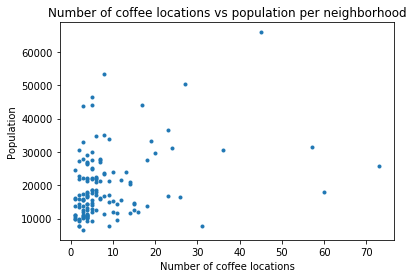

In [28]:
fig = plt.figure()
plt.scatter(coffee_by_nbh['coffee_count'], coffee_by_nbh['Pop_2016'], marker='.')
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Number of coffee locations')
ax.set_ylabel('Population') 
ax.set_title('Number of coffee locations vs population per neighborhood')
plt.savefig('coffee_vs_pop.png')

<p>Create a column to hold the number of people per coffee shop in each neighborhood.</p>

In [29]:
def get_pop_per_coffee(row):
    return int(round(row['Pop_2016']/row['coffee_count']))
coffee_by_nbh['Pop/Coffee'] = coffee_by_nbh.apply(get_pop_per_coffee, axis=1 ) 
coffee_by_nbh = coffee_by_nbh.sort_values('Pop/Coffee', ascending=False)
coffee_by_nbh.head()

,Name,Number,Long,Lat,Land_area,Radius,Pop_2016,Population_density,coffee_count,Pop/Coffee
110,Steeles,116,-79.321165,43.813010,4.53,1201,24623,5436,1,24623
65,Lansing-Westgate,38,-79.424411,43.752116,5.32,1301,16164,3038,1,16164
25,Cliffcrest,123,-79.234067,43.720909,7.01,1494,15935,2273,1,15935
44,Glenfield-Jane Heights,25,-79.512397,43.746383,5.20,1287,30491,5864,2,15246
71,Malvern,132,-79.220498,43.802786,8.85,1678,43794,4948,3,14598


<p>Plot the coffee locations in Toronto.</p>

In [30]:
import folium

In [31]:
to_map = folium.Map(location=[43.73, -79.3832], zoom_start=11, tiles='Stamen Terrain')

for lat, lng, name, neighborhood in zip(to_coffee['lat'], to_coffee['lng'], to_coffee['name'], to_coffee['Number']):
    #label = '{}, {}'.format(name, neighborhood)
    #label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        #popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(to_map)  
    
to_map

In [32]:
to_map.save('to_map.html')